# Analyse de l'Impact des Promotions sur les Ventes Walmart

**Auteur : Terrel NUENTSA**  
Objectif : Déterminer si les promotions (MarkDown) ont un impact réel sur les ventes.

Dataset : Walmart Sales Forecasting

## Objectif

L'objectif de cette analyse est de répondre à la question suivante :

Les promotions (MarkDown1 → MarkDown5) augmentent-elles significativement les ventes hebdomadaires ?

Nous allons.
* Explorer les données
* Construire une variable Promo_Active
* Comparer les ventes avec et sans promo
* Appliquer un test statistique (t-test)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [46]:
sales = pd.read_csv("sales data-set.csv")
stores = pd.read_csv("stores data-set.csv")
features = pd.read_csv("Features data set.csv")

## Description des données

- sales data-set : ventes hebdomadaires
- stores data-set : type + taille magasin
- features data-set : météo + chômage + promotions

Les colonnes MarkDown représentent les promotions.

In [47]:
df = sales.merge(stores, on="Store") \
          .merge(features, on=["Store", "Date"])
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Préparation des variables de promotion

Nous créons.
- `Total_MarkDown` : somme des 5 promos
- `Promo_Active` : vrai si promo > 0

In [48]:
promo_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
df[promo_cols] = df[promo_cols].fillna(0)
df["Total_MarkDown"] = df[promo_cols].sum(axis=1)
df["Promo_Active"] = df["Total_MarkDown"] > 0
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Total_MarkDown,Promo_Active
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,False
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,False
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,False
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,False


## Analyse descriptive

Nous comparons les moyennes des ventes.
- avec promotion
- sans promotion

In [49]:
df.groupby("Promo_Active")["Weekly_Sales"].mean()

Promo_Active
False    15871.522017
True     16177.015244
Name: Weekly_Sales, dtype: float64

## Visualisation : Boxplot des ventes

Un boxplot permet de :
- comparer les distributions
- vérifier si les promotions poussent les ventes

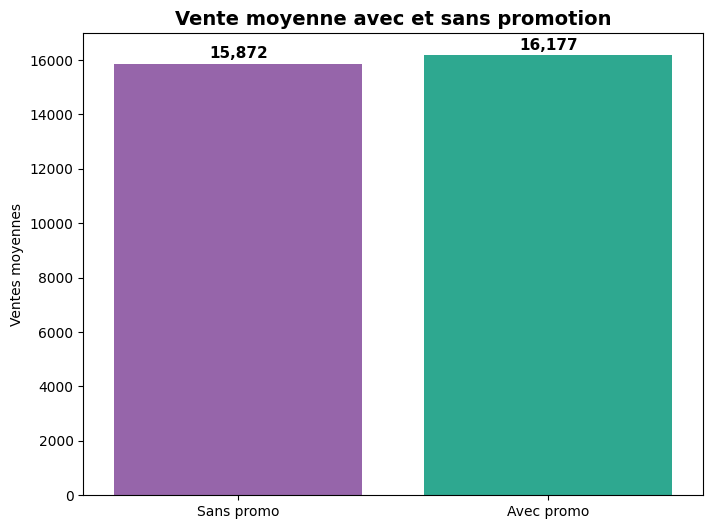

In [81]:
moyennes = df.groupby("Promo_Active")["Weekly_Sales"].mean().reset_index()
moyennes["Promo_Active"] = moyennes["Promo_Active"].map({True: "Avec promo", False: "Sans promo"})

colors = ['#9B59B6', '#1ABC9C']

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=moyennes, x="Promo_Active", y="Weekly_Sales", hue="Promo_Active", palette=colors, legend=False)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 200,
            f'{height:,.0f}',
            ha='center', fontsize=11, fontweight='bold')

plt.title("Vente moyenne avec et sans promotion", fontsize=14, fontweight='bold')
plt.ylabel("Ventes moyennes")
plt.xlabel("")
plt.show()

## Test statistique : t-test

Le test t permet de vérifier si :
- la différence entre les moyennes est due au hasard
ou
- si elle est significative

Hypothèse nulle (H₀) : les promos n'ont **aucun** effet.

In [51]:
from scipy.stats import ttest_ind

sales_promo = df[df["Promo_Active"] == True]["Weekly_Sales"]
sales_no_promo = df[df["Promo_Active"] == False]["Weekly_Sales"]

ttest_ind(sales_promo, sales_no_promo, equal_var=False)

TtestResult(statistic=np.float64(4.1479256392284665), pvalue=np.float64(3.3559225628409e-05), df=np.float64(304203.4256215564))

### Résultats

- t = 4.1479
- p = 3.35e-05

p < 0.05 donc la différence est significative.
p ≈ 0 donc elle est très fortement significative.

Les promotions augmentent les ventes.

## Analyse de la corrélation

Nous mesurons maintenant la relation linéaire entre :
- le montant des promotions
- les ventes hebdomadaires

In [52]:
df_corr = df[["Weekly_Sales", "Total_MarkDown"]].corr()
df_corr

,Weekly_Sales,Total_MarkDown
Weekly_Sales,1.000000,0.065237
Total_MarkDown,0.065237,1.000000


### Interprétation

- 1.00 = auto-corrélation
- La valeur clé est : Weekly_Sales ↔ Total_MarkDown

Plus elle est proche de 1 → plus les promos augmentent les ventes
Proche de 0 → pas de relation
Proche de -1 → les promos font baisser les ventes (très improbable)

## Visualisation Heatmap

Représentation colorée de la corrélation.

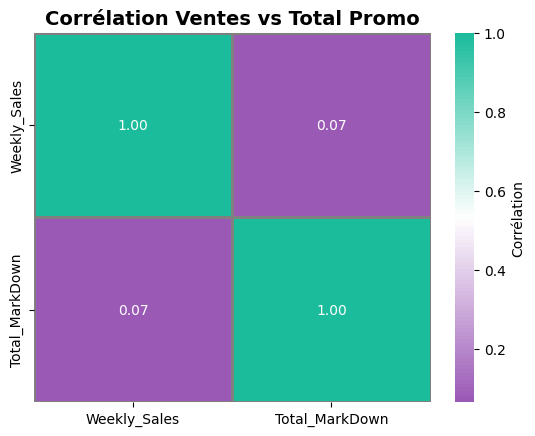

In [82]:
colors_custom = ['#9B59B6', '#FFFFFF', '#1ABC9C']
n_bins = 100
cmap_custom = LinearSegmentedColormap.from_list('custom', colors_custom, N=n_bins)

sns.heatmap(df_corr, annot=True, cmap=cmap_custom, fmt=".2f", cbar_kws={'label': 'Corrélation'}, linewidths=1, linecolor='gray')
plt.title("Corrélation Ventes vs Total Promo", fontsize=14, fontweight='bold')
plt.show()

### Résultat

La corrélation entre `Weekly_Sales` (ventes) et `Total_MarkDown` (montant total) est **positive (0.065)**.

Cependant, cette valeur est **très faible** et proche de 0.

**Interprétation :**
* Le test t a prouvé de manière **statistiquement significative** que le simple *fait* d'activer une promotion (Oui/Non) augmente les ventes.
* Cette faible corrélation suggère que le *montant* de la promotion (par exemple, 1000$ vs 5000$) a très peu d'influence linéaire sur le volume total des ventes.

Le résultat principal de votre analyse reste donc le **test t**, qui est bien plus concluant que cette corrélation.

# Conclusion

Cette analyse montre, preuves à l’appui, que les promotions MarkDown augmentent les ventes.

- **Ventes PLUS élevées avec promos** 
- **Différence statistiquement significative** (p < 0.001)  

Si le *fait* d'activer une promotion s'avère efficace, l'analyse de corrélation (0.065) suggère que le *montant* de la promotion a une influence positive mais très faible sur le volume total des ventes.

Les promotions sont donc un levier commercial efficace pour améliorer le chiffre d'affaires hebdomadaire.